Import các thư viện cần thiết

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Đọc dữ liệu từ file `data/movies_dataset_revenue.csv`

In [24]:
DATA_PATH = "data/raw/movies_dataset_revenue.csv"

df = pd.read_csv(DATA_PATH)
print("Shape of the dataset:", df.shape)
df[:2]

Shape of the dataset: (11187, 17)


,id,title,release_date,budget,revenue,runtime,rating,vote_count,popularity,genres,production_companies,production_countries,director,cast,keywords,original_language,collection
0,8358,Cast Away,2000-12-22,90000000,429632142,143,7.660,11912,7.0546,"Adventure, Drama","20th Century Fox, DreamWorks Pictures, ImageMo...",United States of America,Robert Zemeckis,"Tom Hanks, Helen Hunt, Chris Noth, Paul Sanche...","exotic island, suicide attempt, volleyball, su...",en,NaN
1,10567,Dinosaur,2000-05-19,127500000,354248063,82,6.548,2660,6.7356,"Animation, Family, Adventure, Drama","Walt Disney Feature Animation, The Secret Lab",United States of America,"Ralph Zondag, Eric Leighton","D. B. Sweeney, Alfre Woodard, Ossie Davis, Max...","cataclysm, asteroid, villain, comet, migration...",en,NaN


➡️ **Nhận xét**: 

- Tập dữ liệu có 11187 dòng và 17 cột.

- Mỗi dòng là các thông tin liên quan của một bộ phim bao gồm `id`, `title` (tên), `revenue` (doan thu), `rating` (điểm đánh giá), ...

Có các dòng dữ liệu trùng lặp không?

In [3]:
print("Number of unique values in the first column - 'id': {}".format(df['id'].nunique()))

Number of unique values in the first column - 'id': 11187


➡️ **Nhận xét**: 

- Số `id` khác nhau bằng với số dòng của dữ liệu → không có dòng dữ liệu trùng.

Dữ liệu có những đặc trưng nào và ý nghĩa là gì?

In [4]:
header = df.columns.tolist()
print("Columns (features) in the dataset:")
print(header)

Columns (features) in the dataset:
['id', 'title', 'release_date', 'budget', 'revenue', 'runtime', 'rating', 'vote_count', 'popularity', 'genres', 'production_companies', 'production_countries', 'director', 'cast', 'keywords', 'original_language', 'collection']


➡️ **Nhận xét**: 

- `id`: Mã số định doanh của phim trên trang web [TMDB](https://www.themoviedb.org/)

- `title`: Tên cụ thể của bộ phim.

- `release_date`: Ngày phát hành cụ thể. Doanh thu phim phụ thuộc rất lớn vào "thời điểm vàng".
    - Tháng phát hành: 
        - Tháng 5, 6, 7: Mùa phim bom tấn hè (Summer Blockbusters) → Doanh thu thường cực cao.
        - Tháng 11, 12: Mùa lễ hội/Giáng sinh → Cao.
        - Tháng 1, 9: Thường là "tháng chết" (Dump months) → Thấp.

    - Năm phát hành:
        - Giúp mô hình học được Lạm phát. 100 triệu USD năm 2000 rất khác 100 triệu USD năm 2024.

- `budget`: Ngân sách sản xuất phim.
    - Ý nghĩa: Đây thường là đặc trưng quan trọng nhất (Feature Importance cao nhất). "Tiền đẻ ra tiền", phim bom tấn đầu tư 200 triệu USD thường sẽ có chiến dịch Marketing khổng lồ đi kèm.

- `revenue`: Doanh thu của bộ phim.
    - Ý nghĩa: Đầu ra của mô hình cần dự đoán. 

- `runtime`: Thời lượng, độ dài của bộ phim.
    - Ý nghĩa: Phim quá ngắn (<80p) hoặc quá dài (>180p) có thể ảnh hưởng đến số suất chiếu tại rạp → ảnh hưởng doanh thu.

- `rating`: Điểm đánh giá trung bình bộ phim.
    - Ý nghĩa: Thể hiện chất lượng phim. Tuy nhiên, phim nghệ thuật điểm cao chưa chắc doanh thu đã cao. Cần kết hợp với `vote_count`.

- `vote_count`: Số lượng lượt bình chọn cho bộ phim.
    - Ý nghĩa: Thể hiện độ "Hype" (sự quan tâm) của công chúng. Một phim dở nhưng marketing tốt vẫn có vote_count cao và doanh thu cao. Nó quan trọng hơn điểm số `rating`.

- `popularity`: Độ phổ biến, chỉ số riêng của TMDB tính toán dựa trên lượt xem trang, lượt thêm vào danh sách yêu thích.
    - Ý nghĩa: Đại diện cho xu hướng (Trend) hiện tại.

- `genres`: thể loại của bộ phim. VD: Hành động, Hài, Kinh dị...
    - Ý nghĩa: Phim Hành động/Phiêu lưu thường dễ bán vé hơn phim Tài liệu hay Chính kịch.

- `production_companies`: Hãng sản xuất phim như là Warner Bros, Universal, Disney...
    - Ý nghĩa: các hãng phim nổi tiếng có ưu thế về độ nổi tiếng nên có thể có doanh thu cao.

- `production_countries`: Quốc gia sản xuất phim.
    - Ý nghĩa: Nếu phim sản xuất ở Mỹ Khả năng tiếp cận rạp chiếu ở Việt Nam, Châu Âu, hay Nam Mỹ là rất cao → Doanh thu cao. Hoặc sản xuất ở quốc gia tỷ dân như Trung Quốc thường có doanh thu nội địa cực khủng.

- `director` & `cast`: Đạo diễn và diễn viên.
    - Ý nghĩa: Sức hút ngôi sao, hay đạo diễn nổi tiếng có thể đem lại doanh thu lớn. Tom Cruise hay Leonardo DiCaprio đóng thì khả năng lỗ thấp.

- `keywords`: Từ khóa khi tìm kiếm bộ phim.

- `original_language`: Ngôn ngữ sử dụng trong bộ phim.
    - Ý nghĩa: Một phim nói tiếng Anh (dù sản xuất ở Anh, Úc hay Canada) đều dễ dàng tiếp cận thị trường Mỹ và toàn cầu hơn là một phim nói tiếng Pháp hay tiếng Đức.

- `collection`: Series (Chuỗi) phim có nhiều phần.
    - Ý nghĩa: Cực kỳ quan trọng. Phim thuộc một franchise (phần 2, phần 3) thường có doanh thu đảm bảo nhờ lượng fan cũ.


Các cột có bị thiếu giá trị (Missing value) không?

In [25]:
nan_counts = df.isnull().sum()
print("Number of missing value (NaN) for each column:")
print(nan_counts)

Number of missing value (NaN) for each column:
id                         0
title                      0
release_date               0
budget                     0
revenue                    0
runtime                    0
rating                     0
vote_count                 0
popularity                 0
genres                     2
production_companies     233
production_countries      58
director                   0
cast                      18
keywords                1490
original_language          0
collection              8682
dtype: int64


➡️ **Nhận xét**: 

- Cột `collection` bị thiếu là do phim chỉ có một phần → có thể mã hóa bằng cách chuyển thanh **0 - không thuộc series phim** và **1 - có thuộc series phim**.

- Ở các cột `production_companies`, `keywords`, `cast`và `production_countries` có thể xử lí giá trị thiếu bằng cách điền bằng 'Unknown'.

Các giá trị duy nhất ở từng cột đặc trưng

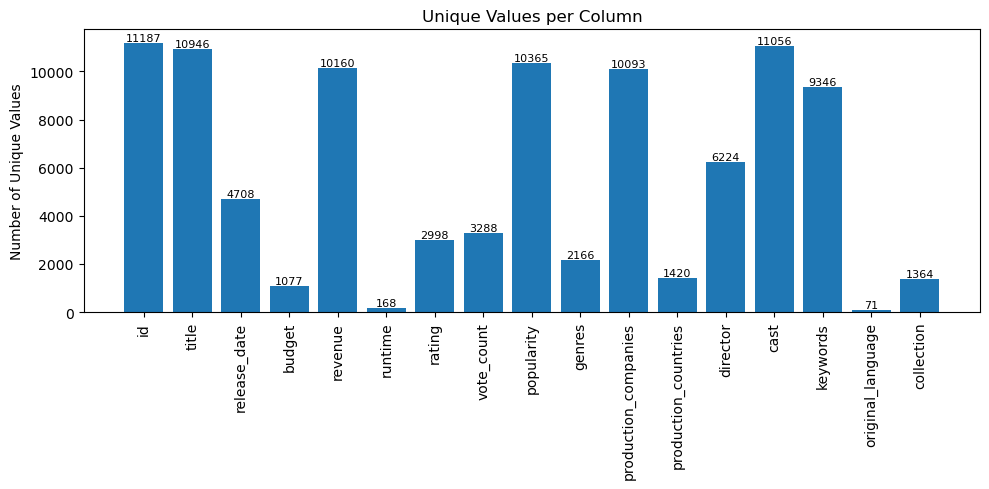

In [26]:
unique_counts = df.nunique()

plt.figure(figsize=(10, 5))
bars = plt.bar(unique_counts.index, unique_counts.values)
plt.xticks(rotation=90)
plt.ylabel("Number of Unique Values")
plt.title("Unique Values per Column")

# chú thích số liệu cụ thể lên đỉnh mỗi cột
for i, v in enumerate(unique_counts.values):
    plt.text(
        i,                # vị trí x (theo index cột)
        v,                # vị trí y (trên đỉnh cột)
        str(v),           # nội dung text
        ha='center',      # căn giữa theo chiều ngang
        va='bottom',      # đặt text ngay phía trên cột
        fontsize=8        # chỉnh nhỏ cho đỡ chồng chéo
    )

plt.tight_layout()
plt.show()

➡️ **Nhận xét**: 

- Cột `id` và `title`: mỗi phim một giá trị → chỉ là khóa định danh, không mang thông tin nội dung → có thể bỏ khi tiền xử lí.

- Cột `cast` và `director`: có khá nhiều giá trị duy nhất (unique values)
    - Đây là thách thức lớn. One-Hot Encoding sẽ tạo ra rất nhiều cột.
    - Giải pháp: Sử dụng kỹ thuật **Target Encoding**. Tính doanh thu trung bình của đạo diễn/diễn viên đó dựa trên các phim quá khứ (trước thời điểm release_date của phim hiện tại).


Doanh thu (`revenue`), Ngân sách (`budget`) của phim có phân phối như thế nào?

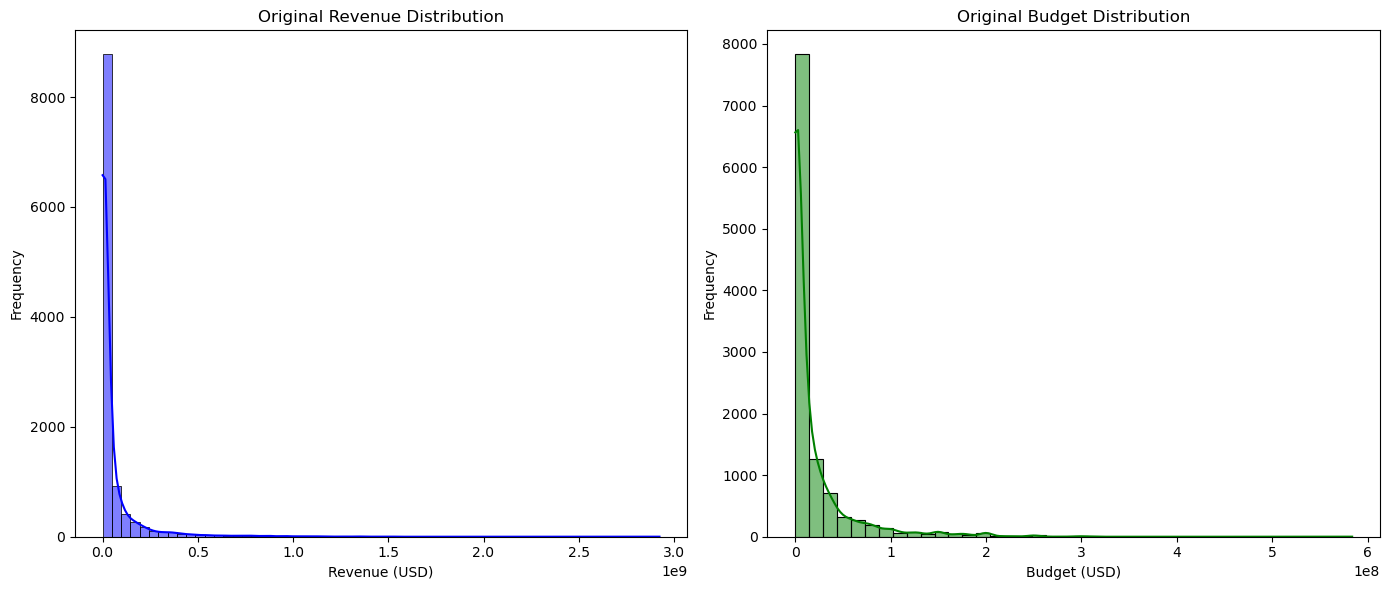

In [27]:
plt.figure(figsize=(14, 6))

# plot1: original revenue distribution
plt.subplot(1, 2, 1)
sns.histplot(df['revenue'], bins=60, color='blue', kde=True)
plt.title('Original Revenue Distribution')
plt.xlabel('Revenue (USD)')
plt.ylabel('Frequency')

# plot2: original budget distribution
plt.subplot(1, 2, 2)
sns.histplot(df['budget'], bins=40, color='green', kde=True)
plt.title('Original Budget Distribution')
plt.xlabel('Budget (USD)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

➡️ **Nhận xét**: 

- Biểu đồ của `revenue` và `budget` đều bị lệch phải nặng, có thể sủ dụng **Log Transformation** để biến phân phối trở nên "chuẩn" (normal) hơn, giúp mô hình sau này học ổn định hơn.

- Cột `budget` có khá nhiều giá trị bằng 0 → có thể điền bằng trung vị (median) của cột hoặc của các phim có cùng thể loại trong từng năm.

Thời lượng  (`runtime`) của bộ phim có phân phối là gì?

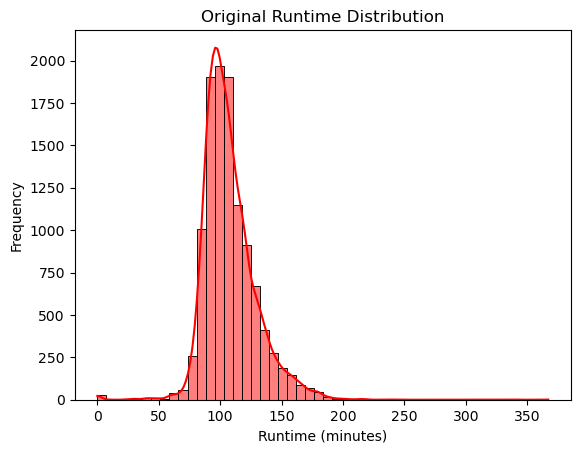

In [8]:
sns.histplot(df['runtime'], bins=50, color='red', kde=True)
plt.title('Original Runtime Distribution')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

➡️ **Nhận xét**: 

- Biểu đồ có dạng hình chuông (Bell curve) đặc trưng nhưng không đối xứng hoàn toàn.

- Cột `runtime` cũng có một ít các giá trị bằng 0 → có thể điền bằng trung vị (median) của cột đó.

Mỗi quan hệ giữa ngân sách `budget` và doanh thu `revenue` như thế nào?

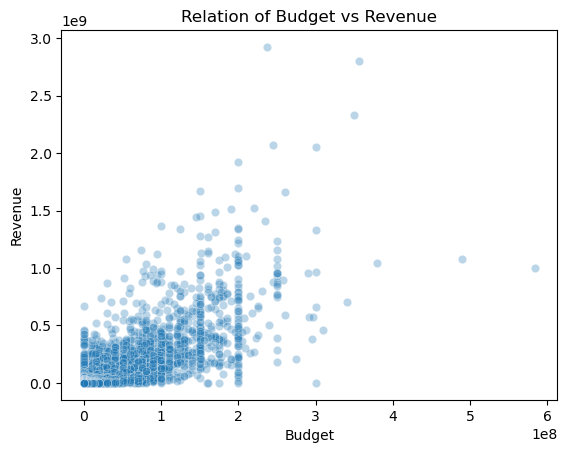

In [28]:
sns.scatterplot(data=df, x='budget', y='revenue', alpha=0.3)
plt.title('Relation of Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

➡️ **Nhận xét**: 

- Có mối tương quan tuyến tính rõ rệt: `budget` tăng → `revenue` thường tăng.

- Tuy nhiên vì `budget` có khác nhiều giá trị bằng không → Có một hàng dọc các điểm tại `bedget = 0` nhưng `revenue` lại trải dài từ thấp đến cao.

Mối quan hệ giữa các cột dữ liệu số có tương quan như thế nào? Vẽ biểu đồ trực quan bằng heatmap.

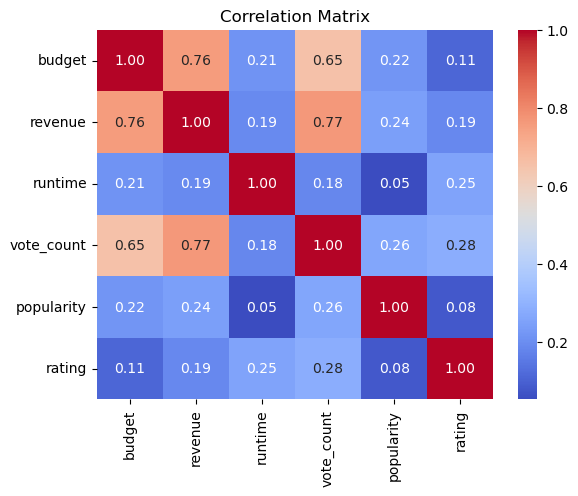

In [10]:
num_cols = ['budget', 'revenue', 'runtime', 'vote_count', 'popularity', 'rating']
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

➡️ **Nhận xét**: 

- `vote_count` (0.78) và `budget` (0.76) tương quan rất mạnh với doanh thu `renvenue` → rất phù hợp để dự đoán doanh thu.

- `popularity` (0.24), `runtime` (0.19) và `rating` (0.19) tương quan khá yếu khi dự đoán doanh thu `renvenue`.

- **Lưu ý**: Vấn đề Rò rỉ Dữ liệu (Data Leakage): `vote_count`, `popularity`, `rating`. Các chỉ số này chỉ có được sau khi bộ phim đã được công chiếu. Sử dụng các biến này sẽ tạo ra Rò rỉ mục tiêu, khiến mô hình có độ chính xác ảo cực cao trên tập huấn luyện nhưng vô dụng trong thực tế khi cần dự đoán cho một dự án phim mới chưa ra mắt

Doanh thu theo `genres` (thể loại) như thế nào? (Do số lớn nên lấy trung bình doanh thu)

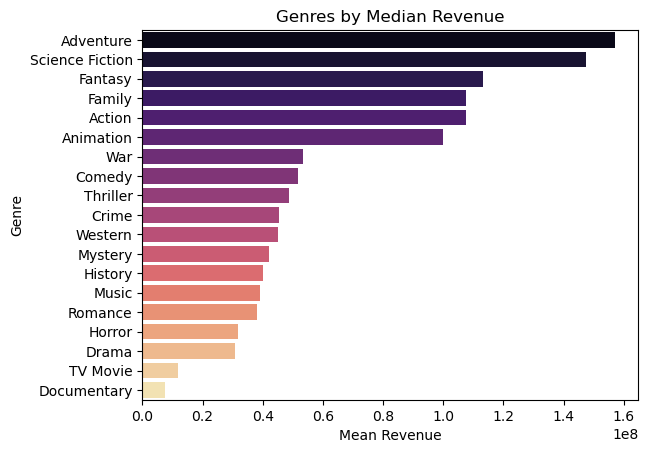

In [11]:
genre_data = []
for index, row in df.iterrows():
    if pd.notna(row['genres']):
        genres = str(row['genres']).split(', ')
        for genre in genres:
            genre_data.append({'genre': genre, 'revenue': row['revenue']})
df_genres = pd.DataFrame(genre_data)
genre_rev = df_genres.groupby('genre')['revenue'].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=genre_rev, y='genre', x='revenue', hue='genre', legend=False, palette='magma')
plt.title('Genres by Median Revenue')
plt.xlabel('Mean Revenue')
plt.ylabel('Genre')
plt.show()

➡️ **Nhận xét**: 

- Các thể loại `Adventure`, `Science Fiction`, `Fantasy`, `Family` và `Action`  có doanh thu trung bình cao nhất → Có thể các phim có cùng thể loại sẽ có xu hướng doanh thu cao hơn so với các thể loại kém phổ biến hơn.

Thời điểm ra mắt phim có thể ảnh hưởng rất nhiều đến doanh thu `revenue` như thế nào qua từng tháng và từng năm?

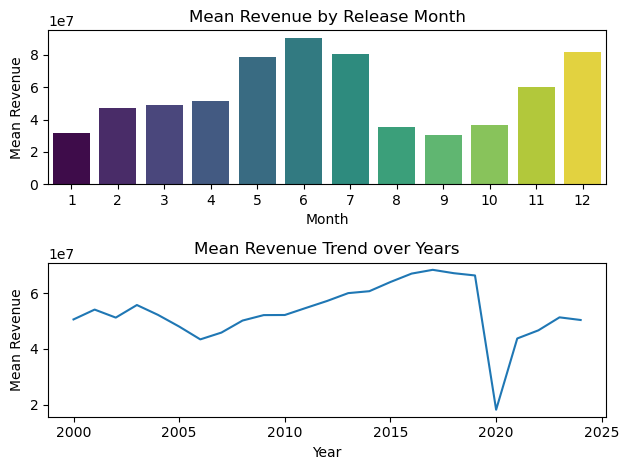

In [12]:
# Convert date
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_month'] = df['release_date'].dt.month
df['release_year'] = df['release_date'].dt.year

# Plot: Average Revenue by Month
plt.subplot(2, 1, 1)
monthly_rev = df.groupby('release_month')['revenue'].mean().reset_index()
sns.barplot(data=monthly_rev, x='release_month', y='revenue', hue='release_month', legend=False, palette='viridis')
plt.title('Mean Revenue by Release Month')
plt.xlabel('Month')
plt.ylabel('Mean Revenue')

# Plot: Revenue over Years (Trend)
plt.subplot(2, 1, 2)
yearly_rev = df.groupby('release_year')['revenue'].mean().reset_index()
sns.lineplot(data=yearly_rev, x='release_year', y='revenue')
plt.title('Mean Revenue Trend over Years')
plt.xlabel('Year')
plt.ylabel('Mean Revenue')
plt.tight_layout()

➡️ **Nhận xét**: 

- Tính mùa vụ rất rõ: Tháng 5, 6, 7 (mùa phim hè) và tháng 11, 12 (mùa lễ hội) có doanh thu trung bình cao hơn hẳn các tháng 1, 9, 10.
    → Tạo đặc trưng mới (Feature Engineering) từ ngày tháng. Ví dụ: Cột `is_blockbuster_season` (1 nếu tháng ra mắt là 5,6,7,11,12; ngược lại là 0)

- Xu hướng doanh thu qua từng năm:
    - **Tăng trưởng mạnh trước `2019`**: Biểu đồ cho thấy sự tăng trưởng đều đặn của tổng doanh thu điện ảnh qua các năm. Đỉnh điểm rơi vào giai đoạn 2015-2019, với doanh thu ổn định. Điều này phản ánh sự phát triển của ngành công nghiệp điện ảnh và lạm phát giá vé.

    - Ở năm `2020` doanh thu giảm đột ngột, nguyên nhân có thể do lúc đó bùng nổ dịch COVID-19, khi các rạp chiếu phim toàn cầu đóng cửa.

    - **Sự phục hồi (`2021-2024`)**: Từ `2021` trở đi, biểu đồ đang có xu hướng đi lên trở lại, nhưng đến `2024` vẫn chưa hoàn toàn quay lại mức đỉnh cao của nhưng năm trước `2019`.